In [8]:
#Loading the iris data set

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

#Load the Iris data set

iris = datasets.load_iris()
X = iris.data
y = iris.target_names[iris.target]     #Target Labels

#Create binary labels : Setosa (0) vs Non setosa (1)
lb = LabelBinarizer()
y = lb.fit_transform(y)[:, 0]

#Split the dataset inti traing seta nd testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Preprocess the data
scaler = StandardScaler()   #Preprocessing technique that standardizes the feature values by scaling them to have a mean of 0 and standard deviation of 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Build a deep learning model using tensorflow

#Imports
import tensorflow as tf       #Import the tensorflow library
from tensorflow import keras
from tensorflow.keras.models import Sequential  #Sequential model is used to create a linear stack of neuarl network layers.
from tensorflow.keras.layers import Dense   #Dense layer represents a fully connected layer in a neural network.

#Define the Model
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))    #Input layer with 4 feartures
model.add(Dense(8, activation = 'relu'))   #Hidden Layer
model.add(Dense(1, activation = 'sigmoid')) #Output layer with sigmoid activation for binary classification

In [17]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Train the model
history = model.fit(
    X_train, y_train, epochs = 50, batch_size = 8, validation_split = 0.1
)

Epoch 1/50
14/14 [==============================] - 2s 21ms/step - loss: 0.6668 - accuracy: 0.6111 - val_loss: 0.6207 - val_accuracy: 0.9167
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.8241 - val_loss: 0.5586 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4988 - accuracy: 0.9259 - val_loss: 0.5038 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 0.9722 - val_loss: 0.4510 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.9722 - val_loss: 0.4037 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.9907 - val_loss: 0.3575 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 1.0000 - val_loss: 0.3161 - val_accuracy: 1.0000
Epoch 8/50
14/14 [=

In [23]:
#Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy : ', accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("F1-Score : ", f1)

1/1 [==============================] - 0s 89ms/step
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-Score :  1.0


In [24]:
#Provide a brief summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                80        
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


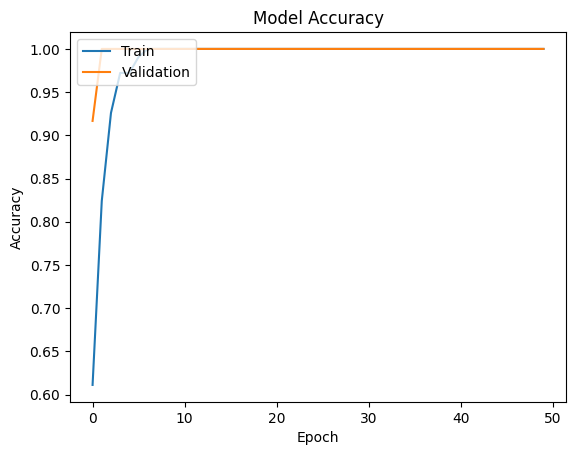

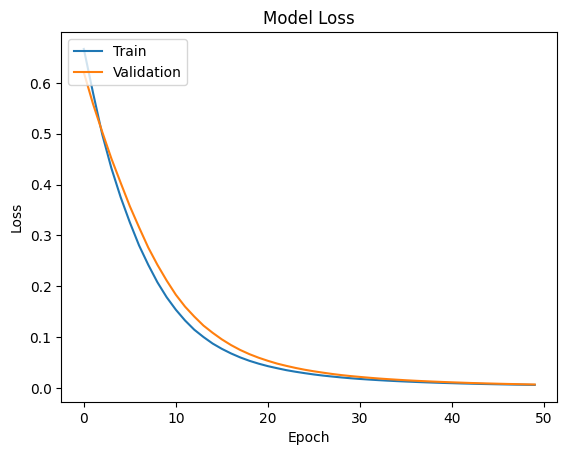

In [26]:
#Visualize the Model's performance
import matplotlib.pyplot as plt

#Plot tarining and validation accuracy values

plt.plot (history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()